# **Detecção de Fraudes em Cartões de Crédito: Um Projeto Prático**

## Introdução

A fraude em cartões de crédito é uma grande preocupação para bancos e instituições financeiras. Os fraudadores utilizam diversas técnicas para roubar informações de cartões de crédito e realizar transações não autorizadas. Neste projeto, exploraremos um conjunto de dados contendo transações de cartões de crédito e construiremos modelos para prever transações fraudulentas.

Utilizaremos o conjunto de dados do Kaggle [Detecção de Fraudes em Cartões de Crédito](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), que contém transações de cartões de crédito realizadas por titulares de cartões europeus. O conjunto de dados é composto por 284.807 transações, das quais 492 são fraudulentas. Os dados contêm apenas variáveis de entrada numéricas que são resultado de transformações de Análise de Componentes Principais (PCA) devido a questões de confidencialidade. As características incluem 'Time', 'Amount' e 'V1' a 'V28', além da variável 'Class', que é a variável alvo que indica se a transação é fraudulenta (1) ou não (0).

Neste projeto, iniciaremos com a análise exploratória dos dados (EDA) para obter uma melhor compreensão dos dados. Em seguida, realizaremos o processamento dos dados e a modelagem, onde construiremos vários modelos de classificação para prever transações fraudulentas. Também abordaremos o problema de classes desbalanceadas utilizando undersampling. Por fim, avaliaremos o desempenho dos modelos e escolheremos o melhor com base em várias métricas de avaliação, como precisão, recall, pontuação F1 e acurácia.


In [1]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score


In [2]:
# Set plot style
plt.style.use('ggplot')

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Set font size for all plots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [3]:
# Loading data
df = pd.read_csv('creditcard.csv')

# 1. Análise Exploratória de Dados (EDA)

In [4]:
# Print random sample of 15 rows to check data loading
df.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94687,64987.0,1.170952,-0.585727,1.519158,0.546188,-1.265546,0.562151,-1.064964,0.228915,1.736706,...,-0.130577,0.170726,-0.120258,0.040019,0.373657,1.155540,0.012863,0.016960,16.96,0
215824,140234.0,-0.610685,0.642294,2.035106,-0.678171,-0.018955,0.630916,1.413948,-0.683512,0.387440,...,-0.358508,-0.498991,-0.412401,-0.496963,0.053434,-0.130631,-0.750012,-0.662000,114.65,0
186903,127302.0,-2.062597,-2.464416,1.337679,-2.905136,1.291374,0.484632,-1.288670,0.694314,-2.064957,...,0.087086,0.129229,0.190479,-1.688119,0.598465,-0.008084,0.225448,0.124126,114.00,0
37101,38806.0,-0.056818,-0.509720,0.887079,-1.151867,-1.329389,1.387213,0.005500,0.023287,-2.063930,...,-0.401461,-0.540246,-0.002019,-1.350699,-0.402685,-0.037316,0.154534,0.084124,181.50,0
24096,33067.0,-0.697801,0.790364,0.644432,-1.534066,0.000106,-0.183415,-0.001206,0.640967,-0.151340,...,-0.091448,-0.425886,-0.112434,-0.814542,-0.124208,0.781728,0.041191,-0.024470,7.30,0
172562,121150.0,-0.875101,0.750206,0.294605,-0.651222,-0.057244,0.109755,-0.131682,0.343250,1.169676,...,-0.015638,0.505209,0.210777,0.614609,-1.273221,0.112138,0.052649,-0.123338,31.93,0
120539,75862.0,-0.707844,0.755911,1.284451,-1.181853,0.230116,-0.833400,1.277942,-0.165465,-1.007898,...,0.089845,0.085359,-0.148216,0.414576,0.176741,0.828138,-0.068285,0.066486,65.50,0
185704,126784.0,2.017743,0.170785,-1.587300,0.338245,0.456179,-0.643245,0.144902,-0.149495,0.094005,...,-0.290373,-0.729293,0.339608,0.692875,-0.285101,0.139658,-0.060946,-0.036762,2.69,0
118406,75067.0,1.292545,0.587348,-0.891720,0.562925,0.576305,-0.659088,0.293357,-0.120813,-0.377411,...,-0.156065,-0.421740,-0.198663,-0.607538,0.652665,0.402592,-0.035273,0.024411,0.76,0
10413,16831.0,1.164481,0.187047,1.385867,1.465545,-0.797311,-0.247172,-0.553406,-0.065697,1.908503,...,-0.163136,-0.043628,0.003078,0.350748,0.389919,-0.455709,0.045580,0.034358,10.21,0


Podemos trabalhar apenas com três variáveis não transformadas, que são **Tempo, Valor e Classe** *(onde Classe assume valores 1 para fraude e 0 para não fraude)*.

In [5]:
# Printing data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Printing numerical summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [7]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Time[float64],Mean (sd) : 94813.9 (47488.1)min < med < max:0.0 < 84692.0 < 172792.0IQR (CV) : 85119.0 (2.0),"124,592 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABi0lEQVR4nO3cMU7CUADH4WocWDQlYSRh14EreIbGc3IGT+ANHEgcTWBEFhhlquQ9av+B79tf0j5+LeU1vLvD4dBAivuxDwBOCZIoD2MfAONZLBavbdvOSsZut9vv9Xr9fuFDEuSpxA9oSG3bzrqu+ykZu1qtiubpL4I8kfgB3ZrIIGvuVJvNZj6dTr9Kxu73+5emaT5Kxo6lZq4SzzcyyMo71bzrus/CsY8l48ZUOVdx5+tXNlEESRRBEkWQRBEkUQRJFEESJXIdkny73e55uVy+lYzte80qSIpMJpOnIV6z+somiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIp/HQa4tj0eawwWpEk+37Xt8VhjsCBNMiU8QxJFkEQRJFEESRRBEkWQRBEkUXrXIS1u8996g7S4fb6aHWVdvL+8y76Qyh1lb+ri7eMZkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkihH+TZs1xsK4CUAAAAASUVORK5CYII="">",0(0.0%)
2,V1[float64],Mean (sd) : 0.0 (2.0)min < med < max:-56.4 < 0.0 < 2.5IQR (CV) : 2.2 (0.0),"275,663 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABKUlEQVR4nO3VsU3DUBhGUYPSIr3CvQdgiczgQT0DE7BDeoq0SRNaCmgsJF/EOe3TL33Fld7T4/GYoOL56AHwlSBJOR09gL9pWZbzGGPec3u9Xj8ul8vbd2+CZJcxxryu623P7bZtP4bsyyZFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiTldPQAjrMsy3mMMe+5vd/vr9M0vf/yJEH+Z2OMeV3X257bbdtefnvPNE3TJ+yYGOjiAcGkAAAAAElFTkSuQmCC"">",0(0.0%)
3,V2[float64],Mean (sd) : 0.0 (1.7)min < med < max:-72.7 < 0.1 < 22.1IQR (CV) : 1.4 (0.0),"275,663 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABGUlEQVR4nO3VoW3DYBRG0bTKAAbh5iVZoTNYnTMzZBXzgB+mKKXFTirfSufwJ33gSu/t8XgcoOJ97wHwmyBJOe49gOfM8/w5TdNpy+0Y47au6/XFk54iyH9umqbTsizfW24vl8umkP+Sl02KIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEkRJCmCJEWQpAiSFEGSIkhSBEmKIEk57j2A/dzv94/z+fy15XaMcVvX9friSYcfQGsa5vMjat4AAAAASUVORK5CYII="">",0(0.0%)
4,V3[float64],Mean (sd) : -0.0 (1.5)min < med < max:-48.3 < 0.2 < 9.4IQR (CV) : 1.9 (-0.0),"275,663 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABKklEQVR4nO3VsU3DYBRG0YDSIv2Few/AEpnBg3oGJmCH9BRpkya0dEhOJF/EOf2TvuJK7+V+vx+g4nXvAfCTIEk57j2A/czzfBpjTFtuL5fL1/l8/njyJEH+Z2OMaVmW65bbdV03hfwbL5sUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIkRZCkCJIUQZIiSFIESYogSREkKYIk5bj3AB4zz/NpjDFtub3dbu+Hw+HzyZMeIsg/bowxLcty3XK7ruvbs/c8yssmRZCkfAOVxBjoAugMRAAAAABJRU5ErkJggg=="">",0(0.0%)
5,V4[float64],Mean (sd) : 0.0 (1.4)min < med < max:-5.7 < -0.0 < 16.9IQR (CV) : 1.6 (0.0),"275,663 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABS0lEQVR4nO3dLU5DQRSA0UIQNZAn6utBdAusoWGdXQMrYA/1iMpSU2wFQfTvfW3O8ZNc8SUjZpL7sN/vJ1DxOPYAcEiQpDyNPcBf5vP5+zAMs2PObjab7/V6/XnmkbiSZJDDMMyWy+XPMWdXq9VRIdPgyiZFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKQIkhRBkiJIUgRJiiBJESQpgiRFkKRcbLXcKfsKd7vd22Qy+TrzSNyAiwV54r7C53PPw21wZZOS3AZ7iu12+7pYLD6OOWu18fjuLsjpdPpitfHtcmWTIkhSBEmKIEkRJCmCJEWQpAiSFEGScncvNafw7Dg+QR7w7Di+f4P0p5Fr+wXhLTxEV

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [9]:
#profile.to_file("credit_report.html")
#profile.to_notebook_iframe()

A partir do gráfico, podemos observar que a variável `Time` possui uma distribuição bimodal com dois picos, indicando que existem dois períodos durante o dia em que as transações com cartão de crédito são mais frequentes. O primeiro pico ocorre em torno de 50.000 segundos (aproximadamente 14 horas), enquanto o segundo pico ocorre em torno de 120.000 segundos (aproximadamente 33 horas). Isso sugere que pode haver um padrão no momento das transações com cartão de crédito que pode ser útil para a detecção de fraudes.

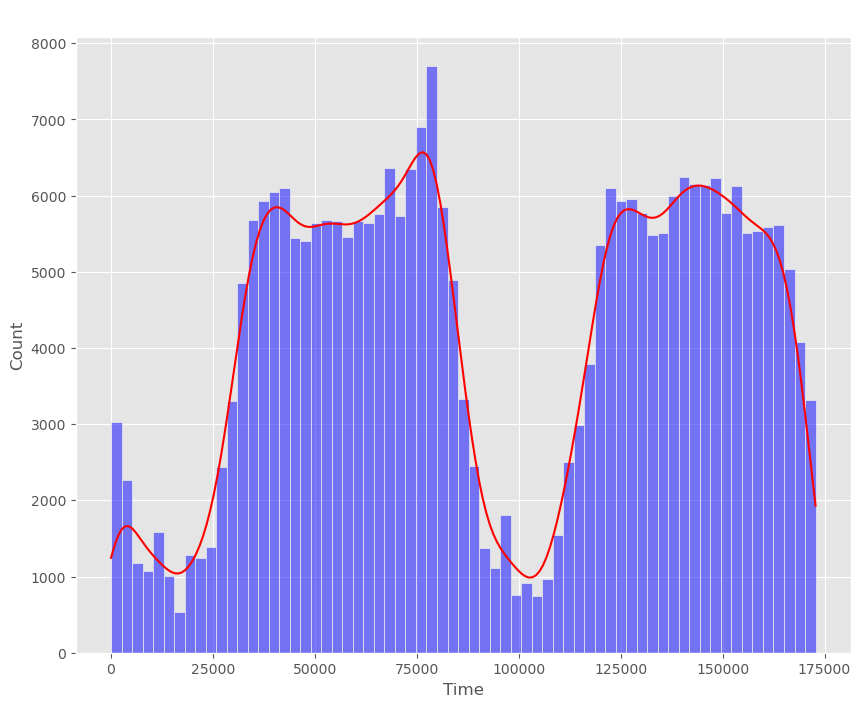

In [10]:
# Plot the distribution of the 'Time' feature
plt.figure(figsize=(10, 8))
plt.title('Distribuição do Tempo (Segundos)')
ax = sns.histplot(df['Time'], color='blue', kde=True)
ax.lines[0].set_color('red')


# Save the plot as a PNG file
plt.savefig('time_distribution.png')

A partir do gráfico, podemos observar que a distribuição da variável Valor (`Amount`) é altamente assimétrica para a direita, com uma cauda longa para a direita. Isso indica que a maioria das transações possui valores baixos, enquanto algumas transações possuem valores extremamente altos. Como resultado, isso sugere que o conjunto de dados contém alguns valores discrepantes (`outliers`) em termos de valores das transações. Portanto, ao construir um modelo de detecção de fraudes, pode ser necessário lidar com valores discrepantes na variável "Valor", por exemplo, usando uma transformação logarítmica ou métodos estatísticos robustos.

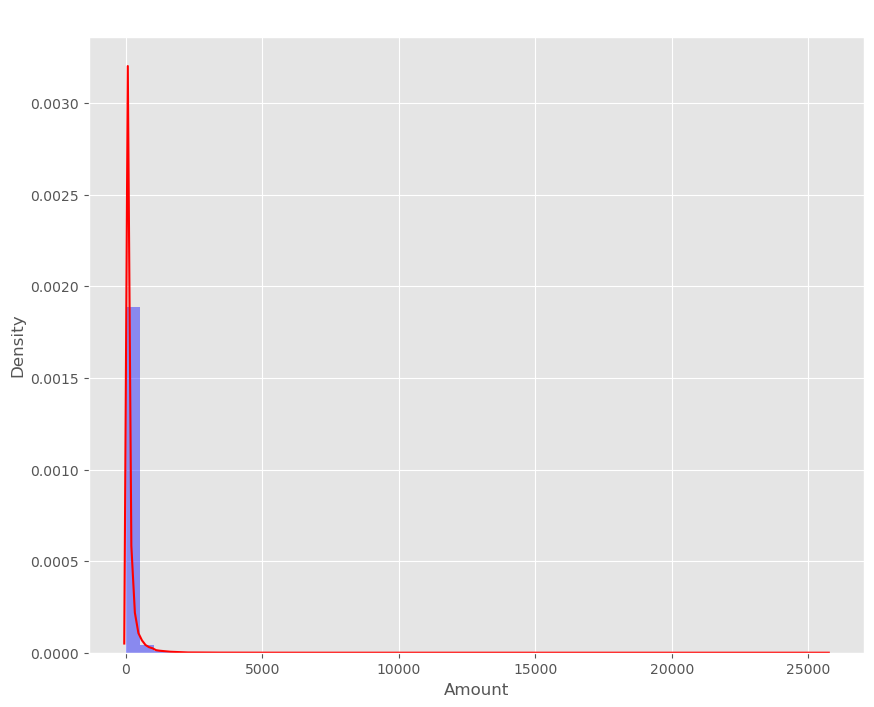

In [11]:
# Plotting distribution of Amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
ax = sns.distplot(df['Amount'], color='blue')
ax.lines[0].set_color('red')

# Save the plot as PNG file
plt.savefig('amount_distribution.png');

In [12]:
# Count the number of fraudulent and non-fraudulent transactions and display them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
ratio = fraud / nonfraud * 100

print(f'Número de fraudes: {fraud}, Número de transações não fraudulentas: {nonfraud}')
print(f'Razão entre fraudes e não fraudes: {fraud}/{nonfraud} ({ratio:.3f}%)')


Número de fraudes: 492, Número de transações não fraudulentas: 284315
Razão entre fraudes e não fraudes: 492/284315 (0.173%)


A partir do gráfico, podemos observar que o conjunto de dados apresenta um desequilíbrio significativo, com a maioria esmagadora das transações sendo não fraudulentas (classe 0) e um número relativamente pequeno de transações sendo fraudulentas (classe 1). Isso indica que o conjunto de dados possui um problema de desequilíbrio de classes, o que pode afetar o desempenho de um modelo treinado com esse conjunto de dados. Pode ser necessário utilizar técnicas como oversampling, undersampling ou ponderação de classes para lidar com o problema de desequilíbrio de classes ao construir um modelo de detecção de fraudes.

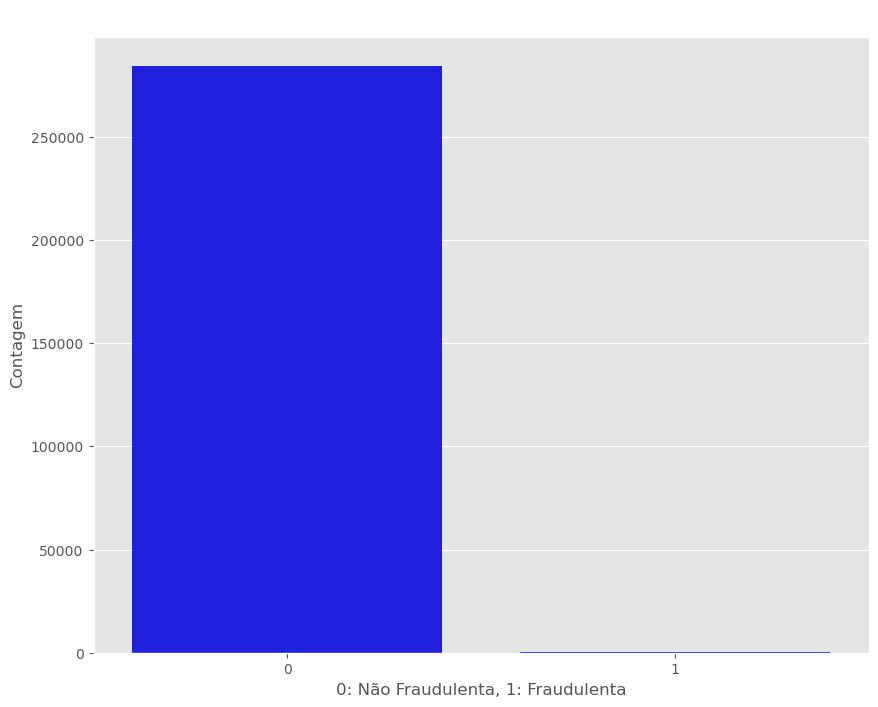

In [13]:
# Plot the count of fraud vs non-fraud transactions in a bar chart
plt.figure(figsize=(10, 8))
sns.countplot(x=df['Class'], color='blue')
plt.title('Transações Fraudulentas vs. Não Fraudulentas')
plt.ylabel('Contagem')
plt.xlabel('0: Não Fraudulenta, 1: Fraudulenta')

# Save the plot as a PNG file
plt.savefig('fraud_vs_nonfraud_transactions.png')

# 2. Processamento dos Dados

A partir do mapa de calor, pode-se observar que não há correlações positivas ou negativas fortes entre quaisquer pares de variáveis no conjunto de dados. As correlações mais fortes são encontradas em:
* Time e V3, com um coeficiente de correlação de `-0,42`
* Amount e V2, com um coeficiente de correlação de `-0,53`
* Amount e V7, com um coeficiente de correlação de `0,4`

Embora essas correlações sejam relativamente altas, não se espera um risco significativo de multicolinearidade. De modo geral, o mapa de calor sugere que não há variáveis altamente correlacionadas que precisem ser removidas antes de construir um modelo de aprendizado de máquina.

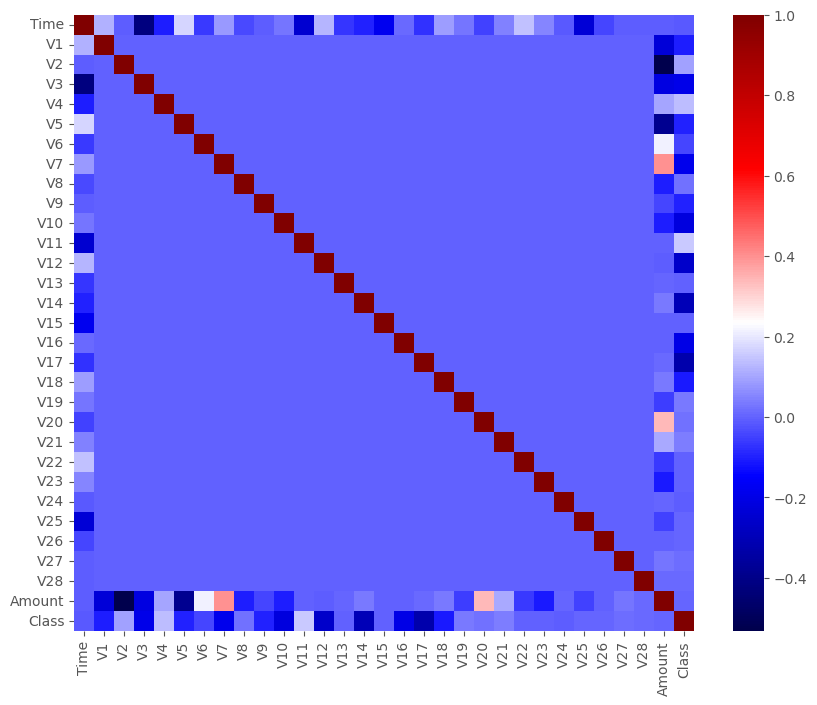

In [14]:
# Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)
# plt.show()

# Save the plot as PNG file
plt.savefig('corr_heatmap.png');

# 3. Modelagem

O conjunto de dados "Detecção de Fraudes em Cartões de Crédito" contém transações de cartões de crédito rotuladas como fraudulentas ou não fraudulentas. O conjunto de dados é desbalanceado, portanto, precisa de um modelo capaz de detectar com precisão as transações fraudulentas sem identificar incorretamente as transações não fraudulentas.

Para auxiliar em problemas de classificação, a técnica **StandardScaler** padroniza os dados, fornecendo uma média de 0 e um desvio padrão de 1, resultando em uma distribuição normal. Essa técnica funciona bem ao lidar com uma ampla faixa de valores de montante e tempo. Para escalonar os dados, utiliza-se o conjunto de treinamento para inicializar o ajuste e, em seguida, dimensiona-se os conjuntos de treinamento, validação e teste antes de alimentá-los nos modelos.

O conjunto de dados foi dividido em 60% para treinamento, 20% para validação e 20% para teste. Para equilibrar o conjunto de dados desbalanceado, foi utilizado o método de **Undersampling Aleatório** (Random Undersampling) para igualar o número de transações fraudulentas. Modelos de Regressão Logística e Random Forest foram utilizados, produzindo bons resultados.

Os modelos comumente usados para o conjunto de dados "Detecção de Fraudes em Cartões de Crédito" são Regressão Logística, Naive Bayes, Random Forest e Dummy Classifier.
* O **Logistic Regression** é amplamente utilizada para detecção de fraudes devido à sua interpretabilidade e capacidade de lidar com grandes conjuntos de dados.
* O **Naive Bayes** é comumente utilizado para detecção de fraudes, pois pode lidar com conjuntos de dados com um grande número de características e fornecer previsões rápidas.
* O **Random Forest** é comumente usado para detecção de fraudes, pois pode lidar com conjuntos de dados complexos e tem menor propensão a overfitting.
* O **Dummy Classifier** é um algoritmo simples usado como referência para comparar o desempenho de outros modelos.

In [15]:
# Drop the 'Class' column to prepare data for splitting
data = df.drop(columns=['Class'])

# Get the target variable
answer = df['Class']

In [16]:
# Split the data into training, validation, and test sets while maintaining the class distribution
X_trainval, X_test, y_trainval, y_test = train_test_split(
    data,
    answer,
    test_size=0.2,
    stratify=df['Class'],
    random_state=42,
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.25,
    stratify=y_trainval,
    random_state=42,
)

# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)


Será utilizado o Undersampling para lidar com o problema de classes desbalanceadas.

In [17]:
# Undersampling will be utilized to address the issue of imbalanced classes.

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

# Undersample the validation set
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)

## 3.1. Logistic Regression

In [18]:
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)

param_grid = {'C': C, 'penalty': penalty}

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(
    logistic,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=10,
    n_jobs=-1,
)
logistic_grid.fit(X_train_under, y_train_under)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 4/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 4/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.948 total time=   0.1s
[CV 1/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 1/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.994 total time=   0.0s
[CV 4/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 3/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 5/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 3/5; 1/10] END ...........C=1.0, penalty=l2;, score=1.000 total time=   0.0s
[CV 4/5; 2/10] END C=21.544346900318832, penalty=l2;, score=0.949 total time=   0.1s
[CV 1/5; 3/10] START C=464.15888336127773, penalty=l2...........................
[CV 5/5; 2/10] END C=21.544346900318832, penalty=l2;, score=0.989 total time=   0.1s
[CV 2/5; 3/10] START C=464.15888336127773, penalty=l2...........................
[CV 3/5; 3/10] START

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

## 3.2. Naive Bayes

In [19]:
# Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

## 3.3. Random Forest

In [20]:
# Random Forest
# Run CV with 5 folds (Random Forest)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 4/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 3/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 5/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 2/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700[CV 2/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500

[CV 1/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 3/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 4/5; 1/24] END max_depth=5, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

## 3.4. Dummy Classifier

In [21]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

# 4. Model Evaluation

## 4.1. Find ROC scores for all models
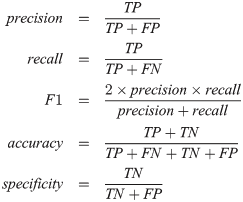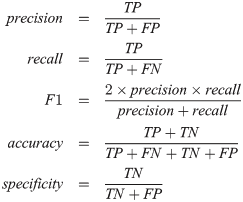


In [22]:
def plot_roc_curves(X, y, models, model_names, figsize=(10, 8)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for model, model_name in zip(models, model_names):
        y_pred_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_proba)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=12)
    leg = plt.legend(loc='lower right', prop={'size': 10})
    leg.get_frame().set_edgecolor('black')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.show()


In [23]:
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

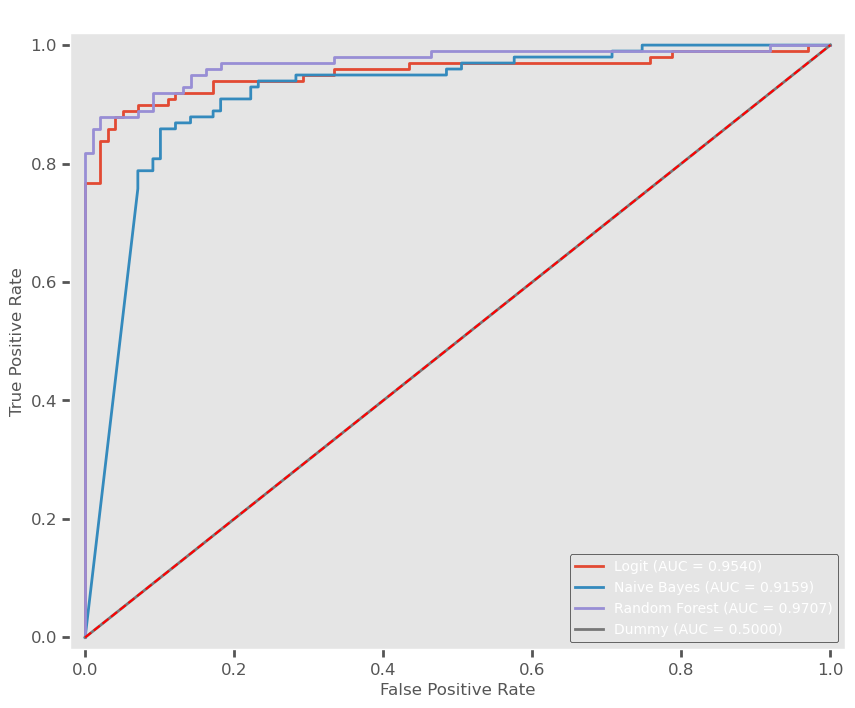

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot ROC curves for in-sample data
plot_roc_curves(X_val_under, y_val_under, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_insample.png');

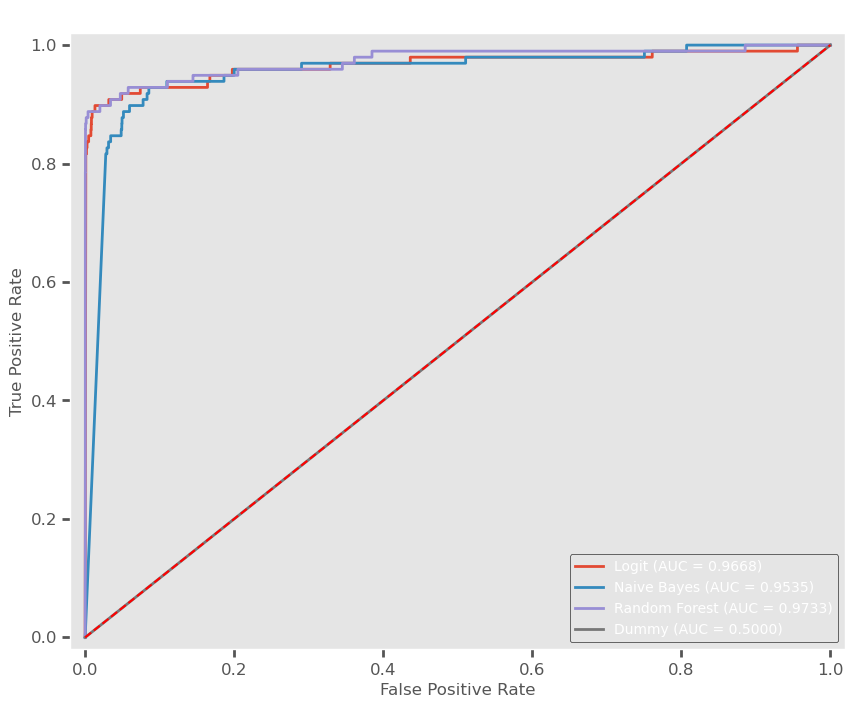

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_outsample.png');

* Recall (Taxa de Verdadeiros Positivos): Essa métrica mede a porcentagem de todas as transações fraudulentas que o modelo identifica corretamente como fraudulentas.
* Precision: Essa métrica indica a porcentagem de itens que o modelo rotula como fraude e que são realmente fraudulentos.
* False Positive Rate: Essa métrica mede a porcentagem de transações não fraudulentas que o modelo rotula incorretamente como fraudulentas.
* Accuracy: Essa métrica reflete com que frequência o modelo está correto em suas previsões de maneira geral. No entanto, pode ser enganosa no caso de dados desbalanceados ou detecção de fraudes.
* F1 score: Essa métrica é uma combinação de precisão e recall, levando em consideração tanto os falsos positivos quanto os falsos negativos. É uma média ponderada de precisão e recall e geralmente é mais útil do que a acurácia, especialmente ao lidar com classes desbalanceadas.

## 4.2. Determinar o optimal threshold para cada modelo.

A função `find_best_threshold()` pode ser usada para determinar o limiar ótimo para um determinado modelo. O limiar ótimo é o valor que maximiza a pontuação F1, uma medida que combina precisão e recall, para um problema de classificação binária.

A função recebe dois argumentos: `model` é o modelo treinado, e `num_steps` é o número de passos na faixa de limiar para iterar.

A função primeiro inicializa variáveis para a pontuação F1 mais alta, o melhor limiar e as melhores pontuações de acurácia, recall e precisão. Em seguida, itera sobre uma faixa de limiares de 0 a 1, com `num_steps` passos. Para cada limiar, ela faz previsões para a variável alvo usando o limiar dado e calcula a pontuação F1, acurácia, recall e precisão. Se a pontuação F1 for maior do que a pontuação F1 mais alta atual, ela atualiza o melhor limiar e as métricas de avaliação.

Após iterar sobre todos os limiares, a função retorna o melhor limiar e as respectivas pontuações de F1, acurácia, recall e precisão.

A equação matemática para encontrar a pontuação F1 é:

`F1 = 2 * (precisão * recall) / (precisão + recall)`

**onde**
* precisão = TP / (TP + FP)
* recall = TP / (TP + FN)
* TP: Verdadeiro Positivo (modelo prevê positivo e é positivo)
* FP: Falso Positivo (modelo prevê positivo, mas é negativo)
* FN: Falso Negativo (modelo prevê negativo, mas é positivo)

In [26]:
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0

    # Iterate over a range of thresholds
    thresholds = np.linspace(0, 1, num_steps)
    for threshold in thresholds:
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val_under, y_predict)
        acc = accuracy_score(y_val_under, y_predict)
        rec = recall_score(y_val_under, y_predict)
        pre = precision_score(y_val_under, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold = threshold
            highest_f1 = f1
            best_acc = acc
            best_rec = rec
            best_pre = pre

    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre


In [27]:
# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]

In [28]:
# Create an empty list to store the results
chart = []

# Iterate over the models and find the best threshold for each one
for model, model_name in zip(models, model_names):
    best_threshold, highest_f1, best_acc, best_rec, best_pre = find_best_threshold(model, 20)
    # Append the results to the chart list
    chart.append([model_name, best_threshold, highest_f1, best_acc, best_rec, best_pre])

# Create a pandas DataFrame from the chart list and display it
chart_columns = ['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision']
chart_df = pd.DataFrame(chart, columns=chart_columns)
chart_df.to_csv('model_evaluation_scores.csv', index=False)
chart_df


,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.842105,0.916667,0.919192,0.888889,0.946237
1,Naive-Bayes,0.052632,0.870466,0.873737,0.848485,0.893617
2,Random Forest,0.421053,0.919786,0.924242,0.868687,0.977273


## 4.3. Confusion Matrix

In [29]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold.

    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.

    Returns:
    --------
    None
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)

    # Calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)

    # Plot the confusion matrix as a heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(
        fraud_confusion,
        cmap=plt.cm.Blues,
        annot=True,
        square=True,
        fmt='d',
        xticklabels=['Not Fraud', 'Fraud'],
        yticklabels=['Not Fraud', 'Fraud']
    )

    # Calculate TP, FP, FN, and TN values from the confusion matrix
    TP, FP = fraud_confusion[0]
    FN, TN = fraud_confusion[1]

    # Rotate y-axis ticks
    plt.yticks(rotation=0)

    # Set plot title, x and y labels
    plt.title('Predicted vs. Actual', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


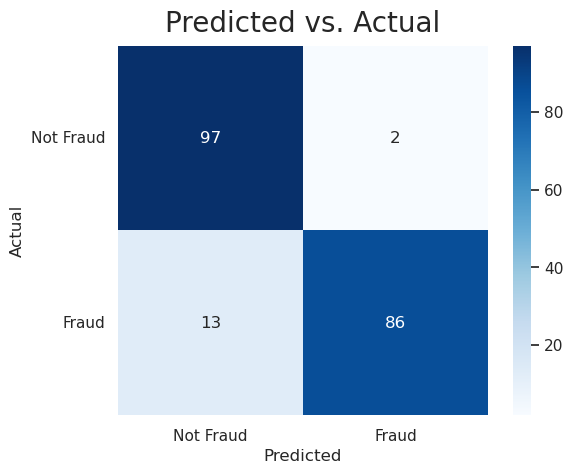

In [30]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_random_forest.png');

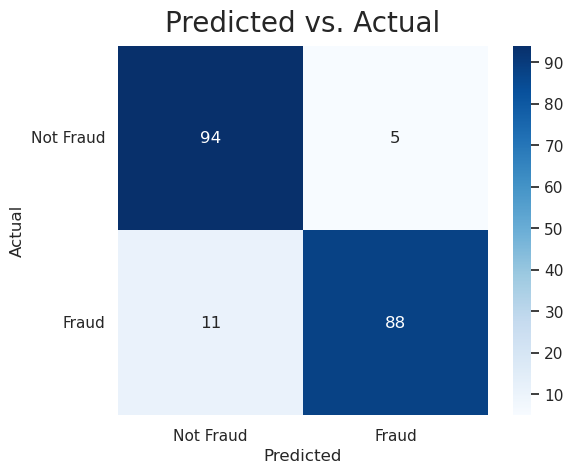

In [31]:
# Create a confusion matrix for the Logistic Regression model with a threshold of 0.842 on the validation data
make_confusion_matrix_val(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_logistic_regression.png');

In [32]:
def make_confusion_matrix_test(model, threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)

    # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(
        fraud_confusion,
        cmap=plt.cm.Blues,
        annot=True,
        square=True,
        fmt='d',
        xticklabels=['Not Fraud', 'Fraud'],
        yticklabels=['Not Fraud', 'Fraud']
    )

    # Calculate TP, FP, FN, TN
    TP, FP = fraud_confusion[0]
    FN, TN = fraud_confusion[1]

    # Add title, labels, and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


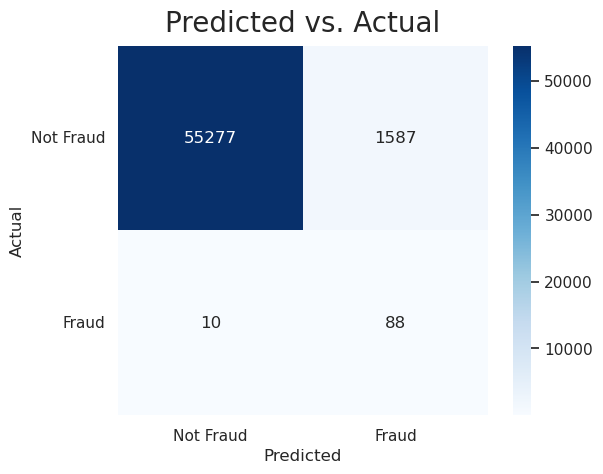

In [33]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');

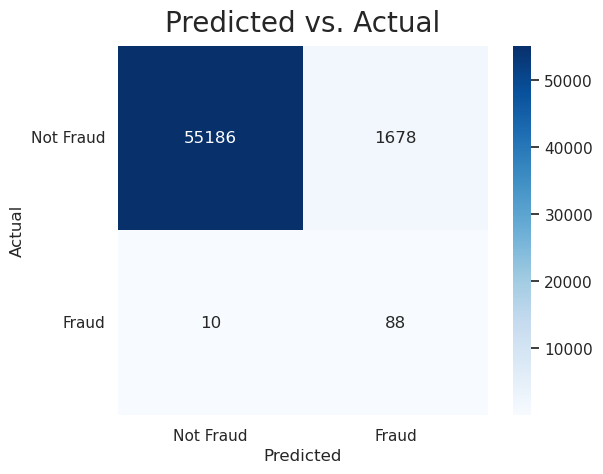

In [34]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_logistic_regression.png');